In [1]:
import numpy as np

import config
import getdata as gd
from modeling_main import get_one_model, get_multiple_models

import warnings
warnings.filterwarnings('ignore')

## Get one classifier model and it's train/test metrices

In [2]:
clf, model_metrics = get_one_model('GLP')

In [3]:
clf

SequentiallyBootstrappedBaggingClassifier(estimator=SVC(C=1000,
                                                        class_weight='balanced',
                                                        gamma=0.0001,
                                                        kernel='linear',
                                                        random_state=42),
                                          n_jobs=-1,
                                          price_bars=time
2016-08-09 00:00:00-04:00    15.36
2016-09-27 00:00:00-04:00    16.35
2016-11-17 00:00:00-05:00    16.75
2016-11-30 00:00:00-05:00    15.80
2016-12-22 00:00:00-05:00    17.80
                             ...  
2022-03-18 00:00:00-04:00    26.68
2022-03-24 00:00...
2016-11-30 00:00:00-05:00   2016-12-22 00:00:00-05:00
2016-12-22 00:00:00-05:00   2016-12-30 00:00:00-05:00
                                       ...           
2022-03-18 00:00:00-04:00   2022-03-24 00:00:00-04:00
2022-03-24 00:00:00-04:00   2022-04-18 00:00:00-04:00
2022-03-30 00:00:00-04:00   2022-04-25 00:00:00-04:00
2022-04-25 00:00:00-04:00   2022-05-16 00:00:00-04:00
2022-05-10 00:00:00-04:00   2022-05-16 00:00:00-04:00
Name: t1, Length: 95, dtype: datetime64[ns, America/New_York])

In [4]:
model_metrics.drop(['best_model'], axis=1)

,type,best_cross_val_score,recall,precision,accuracy,run_time,train_test,symbol,performed_on,event_st_date,event_en_date,rawdata_st_date,rawdata_en_date,SPY_st_date,SPY_en_date
0,sequential_bootstrapping_SVC,0.088288,0.119989,0.069837,0.623897,0.274095,Train,GLP,2023-04-03 17:35:55.442201,2016-08-09 00:00:00-04:00,2022-05-10 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00
1,sequential_bootstrapping_SVC,0.452384,0.404401,0.513287,0.622768,0.012474,Test,GLP,2023-04-03 17:35:55.460678,2022-05-16 00:00:00-04:00,2023-02-17 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00


## Generate list if tickers, then get their trained classifiers and train/test metrices

In [5]:
pgConnStr = gd.pgDictToConn(config.pgSecrets)

lowest_price = 30
highest_price = 40

tickerlst = gd.getFilteredTickerList_Daily(lowest_price=lowest_price, highest_price=highest_price)
print('There are {} tickers between ${} and ${}'.format(len(tickerlst), lowest_price, highest_price))

There are 15 tickers between $30 and $40


In [6]:
clfs, model_metrics_df = get_multiple_models(tickerlst)

Processing 1/15 ACLX...
Only one class found. Unable to train model for ACLX.
Modeling completed 1/15 ACLX
Processing 2/15 AQNU...
Small sample size - Unable to train model for AQNU
Modeling completed 2/15 AQNU
Processing 3/15 ATEX...
Modeling completed 3/15 ATEX
Processing 4/15 AVID...
Modeling completed 4/15 AVID
Processing 5/15 BMEA...
Small sample size - Unable to train model for BMEA
Modeling completed 5/15 BMEA
Processing 6/15 BROS...
Small sample size - Unable to train model for BROS
Modeling completed 6/15 BROS
Processing 7/15 CIR...
Modeling completed 7/15 CIR
Processing 8/15 CRTO...
Modeling completed 8/15 CRTO
Processing 9/15 FDP...
Modeling completed 9/15 FDP
Processing 10/15 FSBW...
Modeling completed 10/15 FSBW
Processing 11/15 GLP...
Modeling completed 11/15 GLP
Processing 12/15 GPRE...
Modeling completed 12/15 GPRE
Processing 13/15 RNST...
Modeling completed 13/15 RNST
Processing 14/15 SCHN...
Modeling completed 14/15 SCHN
Processing 15/15 TITN...
Modeling completed 15/

In [7]:
model_metrics_df.drop(['best_model'], axis=1)

,type,best_cross_val_score,recall,precision,accuracy,run_time,train_test,symbol,performed_on,event_st_date,event_en_date,rawdata_st_date,rawdata_en_date,SPY_st_date,SPY_en_date
0,NaN,NaN,NaN,NaN,NaN,NaN,No Train - single class,ACLX,2023-04-03 17:35:57.088043,NaT,NaT,2022-02-04 00:00:00-05:00,2023-03-30 00:00:00-04:00,2022-02-04 00:00:00-05:00,2023-03-30 00:00:00-04:00
1,NaN,NaN,NaN,NaN,NaN,NaN,No Train - small sample size,AQNU,2023-04-03 17:36:04.375255,NaT,NaT,2021-06-29 00:00:00-04:00,2023-03-30 00:00:00-04:00,2021-06-29 00:00:00-04:00,2023-03-30 00:00:00-04:00
2,sequential_bootstrapping_SVC,0.084738,0.094170,0.077023,0.696111,0.190396,Train,ATEX,2023-04-03 17:36:21.456962,2018-06-19 00:00:00-04:00,2022-02-04 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-03-30 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-30 00:00:00-04:00
3,sequential_bootstrapping_SVC,0.185040,0.345044,0.126418,0.743256,0.013906,Test,ATEX,2023-04-03 17:36:21.476045,2022-03-11 00:00:00-05:00,2023-02-21 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-03-30 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-30 00:00:00-04:00
4,sequential_bootstrapping_SVC,0.271958,0.434239,0.206779,0.546491,0.486849,Train,AVID,2023-04-03 17:36:31.721262,2017-08-04 00:00:00-04:00,2022-04-26 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00
5,sequential_bootstrapping_SVC,0.285673,0.799555,0.173904,0.470772,0.012003,Test,AVID,2023-04-03 17:36:31.739267,2022-05-05 00:00:00-04:00,2023-02-09 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00
6,NaN,NaN,NaN,NaN,NaN,NaN,No Train - small sample size,BMEA,2023-04-03 17:36:43.001834,NaT,NaT,2021-04-16 00:00:00-04:00,2023-03-30 00:00:00-04:00,2021-04-16 00:00:00-04:00,2023-03-30 00:00:00-04:00
7,NaN,NaN,NaN,NaN,NaN,NaN,No Train - small sample size,BROS,2023-04-03 17:37:00.683720,NaT,NaT,2021-09-15 00:00:00-04:00,2023-03-30 00:00:00-04:00,2021-09-15 00:00:00-04:00,2023-03-30 00:00:00-04:00
8,sequential_bootstrapping_SVC,0.215135,0.367430,0.154721,0.600706,0.386238,Train,CIR,2023-04-03 17:37:25.210256,2016-09-16 00:00:00-04:00,2021-11-09 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00
9,sequential_bootstrapping_SVC,0.170473,0.130564,0.245520,0.610359,0.011492,Test,CIR,2023-04-03 17:37:25.227166,2021-12-01 00:00:00-05:00,2023-03-14 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00


In [9]:
# save artifacts - model metrics df
import datetime
import os

folder_name = 'artifacts'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
file_path = os.path.join(folder_name, 'model_metrics_demo_{}.csv'.format(datetime.datetime.now().strftime("%Y%m%d%H%M%S")))

model_metrics_df.to_csv(file_path, index=False)


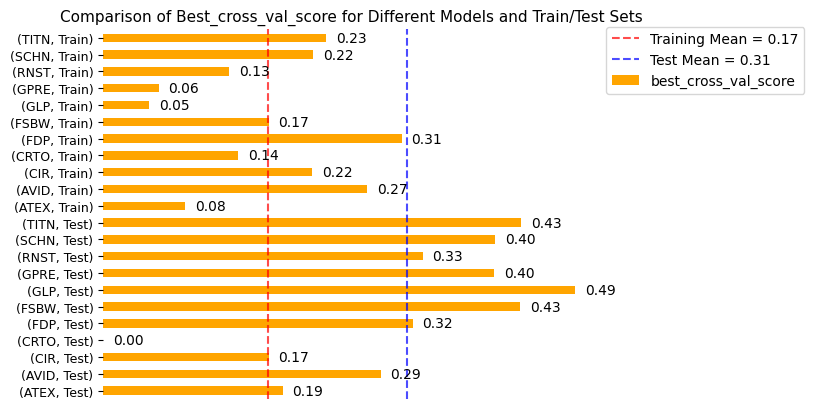

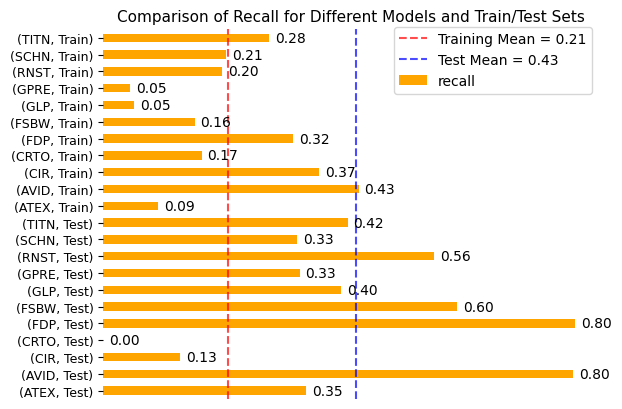

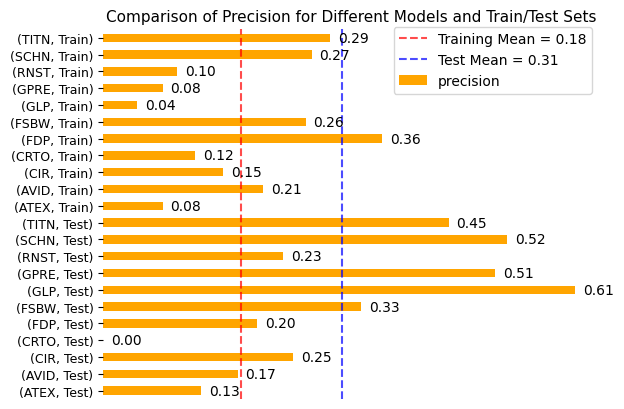

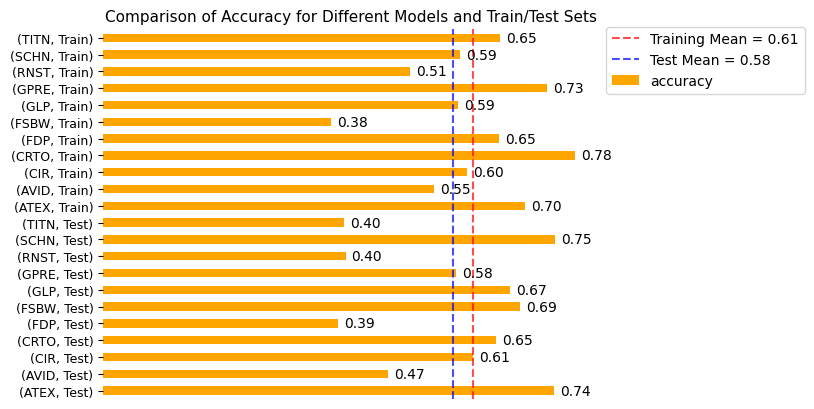

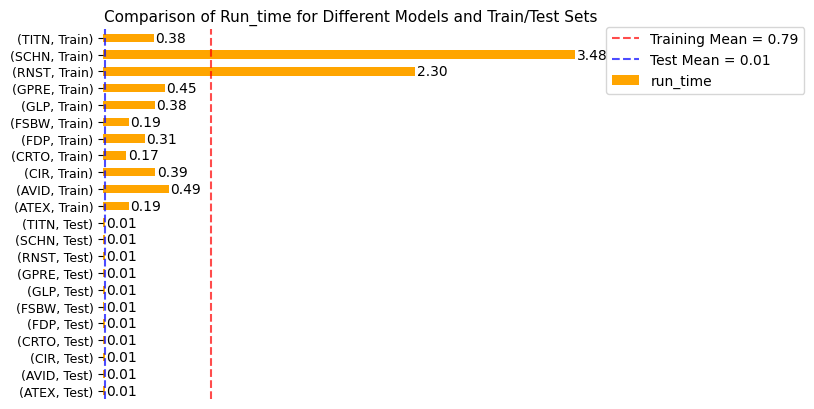

In [60]:
# check the results
import matplotlib.pyplot as plt
%matplotlib inline

model_metrics_tbl_temp = model_metrics_df[['symbol','train_test','best_cross_val_score','recall','precision','accuracy','run_time']].dropna().set_index(['symbol', 'train_test']).sort_index(level=1)
metric_means = model_metrics_tbl_temp.groupby('train_test').mean()
for metric in model_metrics_tbl_temp.columns:
    ax = model_metrics_tbl_temp[metric].plot(kind='barh', rot=0, fontsize=9, color='orange')
    for patch in ax.patches:
        width = patch.get_width()
        height = patch.get_height()
        x, y = patch.get_xy()
        ax.annotate(f'{width:.2f}', (x + width + 0.01, y + height/2), ha='left', va='center')
    mean_train = metric_means.loc['Train', metric]
    mean_test = metric_means.loc['Test', metric]
    ax.axvline(x=mean_train, color='red', linestyle='--',alpha=0.7,label=f'Training Mean = {mean_train:.2f}')
    ax.axvline(x=mean_test, color='blue', linestyle='--',alpha=0.7,label=f'Test Mean = {mean_test:.2f}')
    ax.grid(False)
    legend = ax.legend(bbox_to_anchor=(0.9, 0.9), 
                       bbox_transform=plt.gcf().transFigure)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'Comparison of {metric.capitalize()} for Different Models and Train/Test Sets', fontsize=11)
    #plt.subplots_adjust(bottom=0.1)
    plt.show()